In [86]:
import pandas as pd
import numpy as np
df = pd.read_csv('../csvs/lab7.csv',encoding='cp1251')
print(df.head(5))
df.info()

   id  gender  age  income  spending_rating
0   1       1   19      15               39
1   2       1   21      15               81
2   3       0   20      16                6
3   4       0   23      16               77
4   5       0   31      17               40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               198 non-null    int64
 1   gender           198 non-null    int64
 2   age              198 non-null    int64
 3   income           198 non-null    int64
 4   spending_rating  198 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [87]:
from sklearn.model_selection import train_test_split

y = df['gender'].astype(int)
X = df.drop('gender', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.5, random_state=10)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)


(99, 4) (99, 4) (99,) (99,)


In [88]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_valid)
print('False predicts:' , (y_valid != y_pred).sum())
print('True predicts:' , (y_valid == y_pred).sum())

False predicts: 41
True predicts: 58


In [89]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
y_pred = DT.fit(X_train, y_train).predict(X_valid)
print('True:',(y_valid != y_pred).sum())
print('Not true:',(y_valid == y_pred).sum())

True: 39
Not true: 60


DecisionTreeClassifier(max_depth=4, random_state=10)


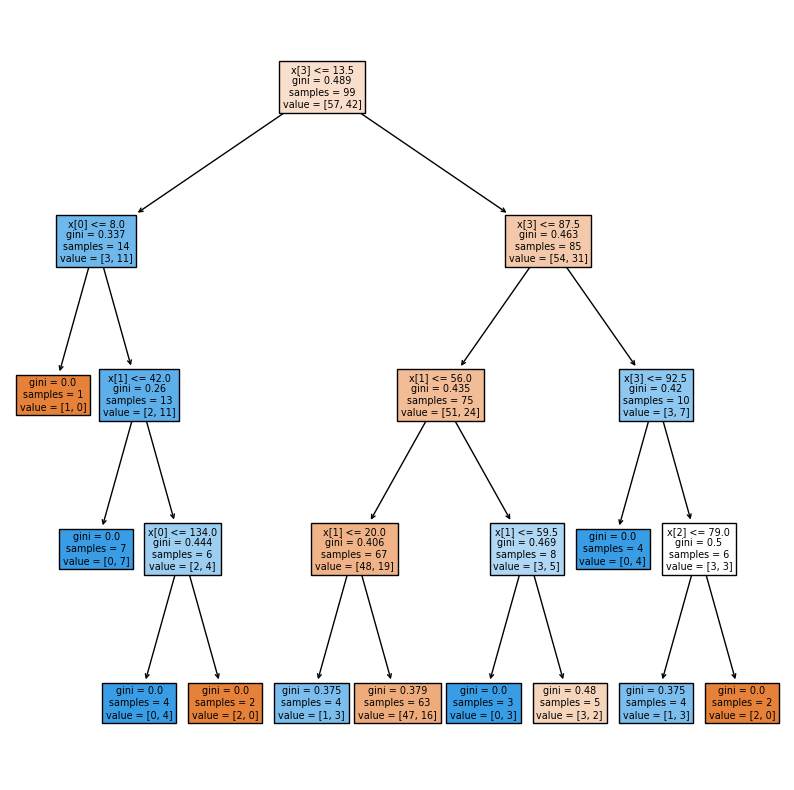

In [90]:

from sklearn import tree
from matplotlib import pyplot as plt

short_DT = DecisionTreeClassifier(max_depth=4, random_state=10)
print(short_DT.fit(X_train, y_train))
plt.subplots(1,1,figsize = (10,10))
tree.plot_tree(short_DT, filled = True)
plt.show()


## Задание

1. Загрузить пред обработанные данные, вывести первые 5 строк из 
датасета;
2. Выделить данные и метки признаков, разбейте выборку на обучающую 
и тестовую в пропорции 75/25;
3. Провести классификацию наблюдений наивным байесовским методом и 
методом деревьев;
4. Указать точность наблюдений score() и измените пропорции выборки
(85/15,75/25, 65/35, 55/45, 45/55, 35/65, 25/75, 15/85);
5. Построить график зависимости неправильно классифицированных 
результатов в зависимости от пропорции выборки.
6. Отобразите дерево максимальной глубиной 3.

In [91]:
df = pd.read_csv('../csvs/lab7.csv',encoding='cp1251')
print(df.head(5))
df.info()

   id  gender  age  income  spending_rating
0   1       1   19      15               39
1   2       1   21      15               81
2   3       0   20      16                6
3   4       0   23      16               77
4   5       0   31      17               40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               198 non-null    int64
 1   gender           198 non-null    int64
 2   age              198 non-null    int64
 3   income           198 non-null    int64
 4   spending_rating  198 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [92]:
y = df['gender'].astype(int)
X = df.drop(['gender', 'id'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=10)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(148, 3) (50, 3) (148,) (50,)


In [93]:
gnb = GaussianNB().fit(X_train, y_train)

DT = DecisionTreeClassifier().fit(X_train, y_train)

print("GNB accurasy:", gnb.score(X_valid, y_valid))
print("DT accuracy:", DT.score(X_valid, y_valid))

GNB accurasy: 0.54
DT accuracy: 0.54


In [94]:
splits = [0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15]

GNB_false_predicts = []
DT_false_predicts = []

for split in splits:
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=split, random_state=10)
    gnb = GaussianNB().fit(X_train, y_train)
    DT = DecisionTreeClassifier().fit(X_train, y_train)
    print("Split coef is: ", split)
    print("GNB accurasy:", gnb.score(X_valid, y_valid))
    y_pred = gnb.predict(X_valid)
    GNB_false_predicts.append((y_valid != y_pred).sum())
    print("Dt accuracy:", DT.score(X_valid, y_valid))
    y_pred = DT.predict(X_valid)
    DT_false_predicts.append((y_valid != y_pred).sum())
    print("\n\n")

Split coef is:  0.85
GNB accurasy: 0.5
Dt accuracy: 0.5666666666666667



Split coef is:  0.75
GNB accurasy: 0.54
Dt accuracy: 0.54



Split coef is:  0.65
GNB accurasy: 0.5857142857142857
Dt accuracy: 0.6



Split coef is:  0.55
GNB accurasy: 0.5777777777777777
Dt accuracy: 0.5666666666666667


Split coef is:  0.45
GNB accurasy: 0.5871559633027523
Dt accuracy: 0.5596330275229358



Split coef is:  0.35
GNB accurasy: 0.5658914728682171
Dt accuracy: 0.5503875968992248



Split coef is:  0.25
GNB accurasy: 0.5436241610738255
Dt accuracy: 0.5704697986577181



Split coef is:  0.15
GNB accurasy: 0.5621301775147929
Dt accuracy: 0.4970414201183432



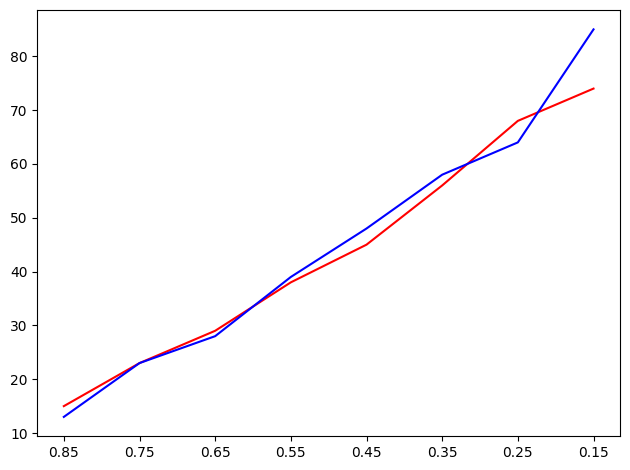

In [95]:
plt.plot(GNB_false_predicts, color='r', label='GNB mistakes')
plt.plot(DT_false_predicts, color='b', label='DT mistakes')
plt.xticks(range(len(splits)), splits)
plt.tight_layout()
plt.show()

DecisionTreeClassifier(max_depth=3, random_state=10)


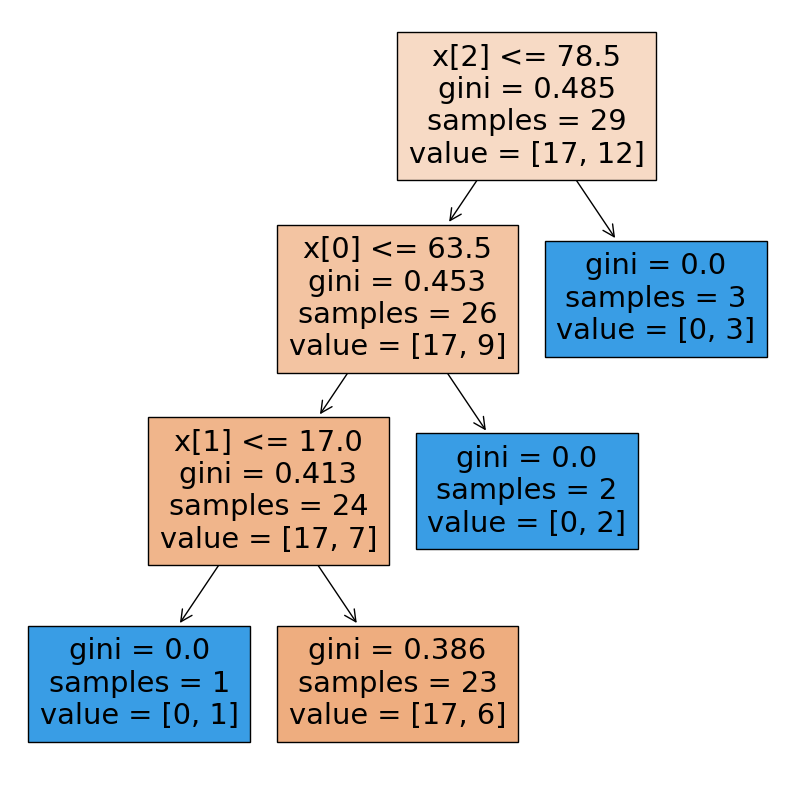

In [96]:
short_DT = DecisionTreeClassifier(max_depth=3, random_state=10)
print(short_DT.fit(X_train, y_train))
plt.subplots(1,1,figsize = (10,10))
tree.plot_tree(short_DT, filled = True)
plt.show()

# OTCHET


In [97]:
from sklearn.metrics import accuracy_score

df = pd.read_csv('../csvs/lab7.csv',encoding='cp1251')
print(df.head(5))


y = df['gender'].astype(int)
X = df.drop(['gender', 'id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   id  gender  age  income  spending_rating
0   1       1   19      15               39
1   2       1   21      15               81
2   3       0   20      16                6
3   4       0   23      16               77
4   5       0   31      17               40


In [98]:
def evaluate_decision_tree(max_depth, min_samples_split, min_samples_leaf, criterion, splitter):
    # Создание классифицирующего дерева
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf, criterion=criterion, splitter=splitter)
    # Обучение модели
    clf.fit(X_train, y_train)

    # Предсказания на тестовой выборке
    y_pred = clf.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [99]:
max_depth_values = [None, 10, 20]
min_samples_split_values = [2, 10]
min_samples_leaf_values = [1, 5]
criterion_values = ['gini', 'entropy']
splitter_values = ['best', 'random']

results = []

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            for criterion in criterion_values:
                for splitter in splitter_values:
                    accuracy = evaluate_decision_tree(max_depth, min_samples_split, min_samples_leaf, criterion, splitter)
                    results.append({
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'criterion': criterion,
                        'splitter': splitter,
                        'accuracy': accuracy
                    })

results_df = pd.DataFrame(results)
print(results_df.head(5))


   max_depth  min_samples_split  min_samples_leaf criterion splitter  accuracy
0        NaN                  2                 1      gini     best     0.650
1        NaN                  2                 1      gini   random     0.500
2        NaN                  2                 1   entropy     best     0.575
3        NaN                  2                 1   entropy   random     0.600
4        NaN                  2                 5      gini     best     0.575


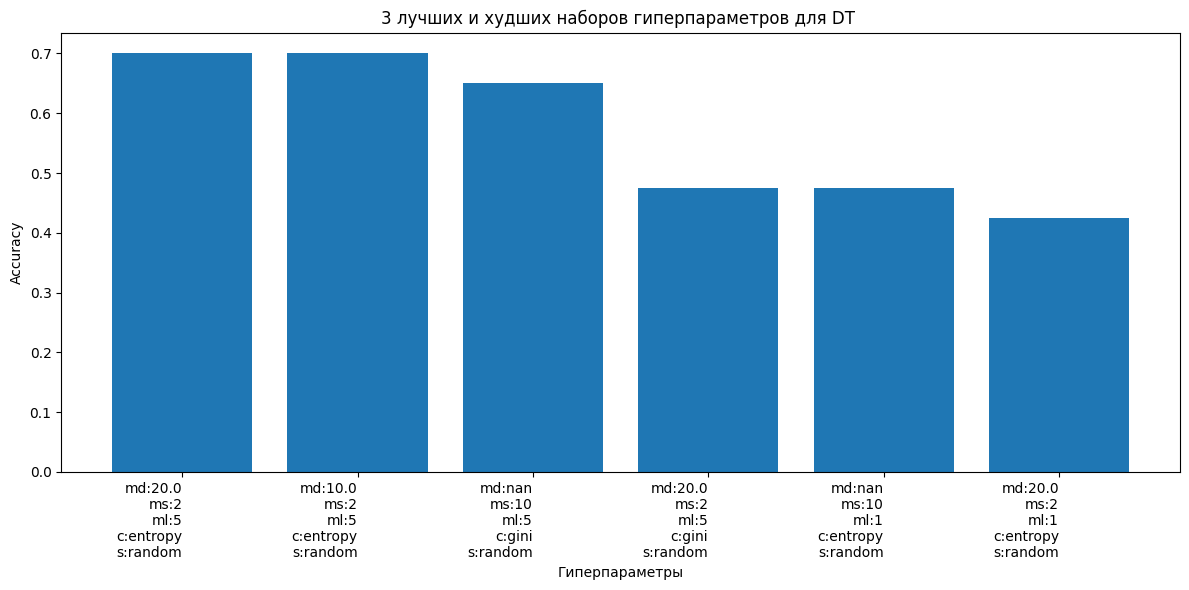

In [108]:
# Сортировка по точности
sorted_results = results_df.sort_values(by='accuracy', ascending=False)

# Выбор 3 лучших и 3 худших комбинаций
top_3 = sorted_results.head(3)
bottom_3 = sorted_results.tail(3)

# Объединение лучших и худших комбинаций
best_worst_df = pd.concat([top_3, bottom_3])


plt.figure(figsize=(12, 6))
best_worst_df['config'] = best_worst_df.apply(lambda row: f"md:{row['max_depth']}\nms:{row['min_samples_split']}\nml:{row['min_samples_leaf']}\nc:{row['criterion']}\ns:{row['splitter']}", axis=1)

plt.bar(best_worst_df['config'], best_worst_df['accuracy'])
plt.xlabel('Гиперпараметры')
plt.ylabel('Accuracy')
plt.title('3 лучших и худших наборов гиперпараметров для DT ')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [102]:
def evaluate_knn_with_different_test_sizes(X, y, test_size_values, n_neighbors=5):
    incorrect_predictions = []
    accuracy_scores = []

    for test_size in test_size_values:
        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Создание и обучение модели k-NN
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = knn.predict(X_test)

        # Оценка точности модели
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        # Количество неправильно классифицированных наблюдений
        incorrect = np.sum(y_pred != y_test)
        incorrect_predictions.append(incorrect)

    return incorrect_predictions, accuracy_scores


In [103]:
test_size_values = np.arange(0.05, 1.0, 0.05)
incorrect_predictions, accuracy_scores = evaluate_knn_with_different_test_sizes(X, y, test_size_values)


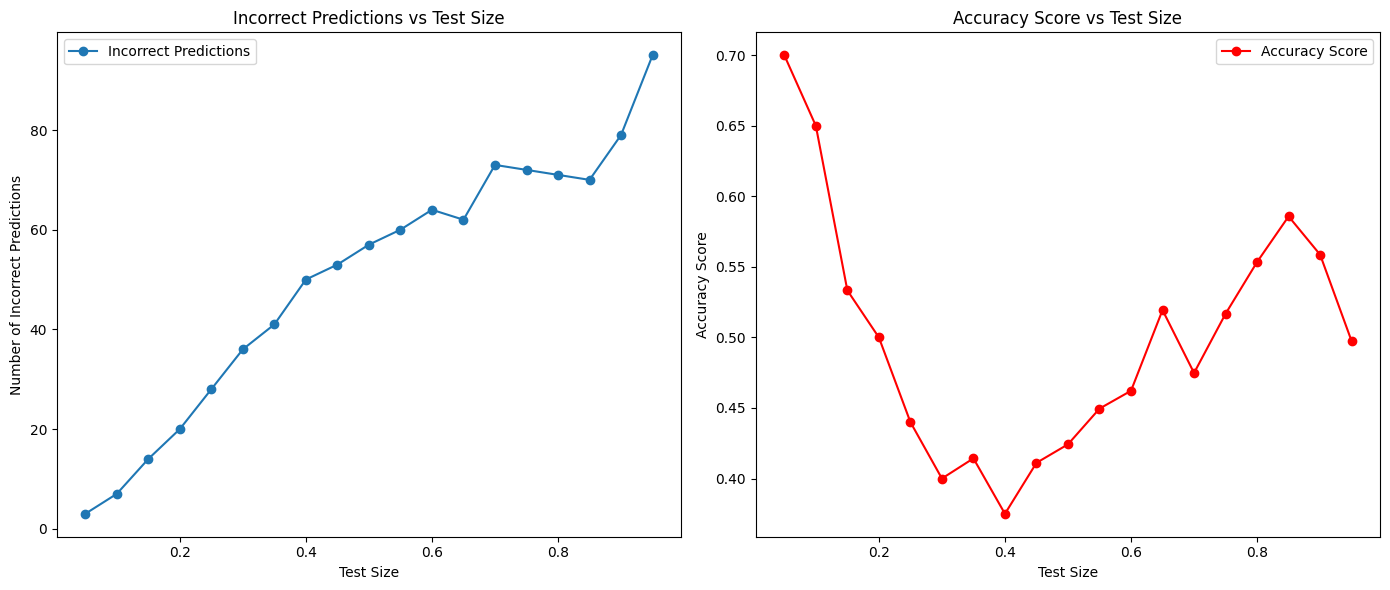

In [104]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(test_size_values, incorrect_predictions, marker='o', label='Incorrect Predictions')
plt.title('Incorrect Predictions vs Test Size')
plt.xlabel('Test Size')
plt.ylabel('Number of Incorrect Predictions')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_size_values, accuracy_scores, marker='o', color='r', label='Accuracy Score')
plt.title('Accuracy Score vs Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.legend()

plt.tight_layout()
plt.show()